# Name: Shubham Luharuka
# Email: shubhaml_cs19.rvitm@rvei.edu.in

In [ ]:
# Load all important libraries

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Load the dataset

In [171]:
data=pd.read_csv(r'C:\Users\luhar\DAA project\Innomatics Research Lab Test\data.csv') # give the filepath
print(data.head())
print()
print("Length of data", len(data))

           x1          x2  y
0 -119.366669  115.000000  1
1 -101.108045   97.777159  1
2 -130.278658  106.767654  1
3 -114.703415  101.195477  1
4 -119.366669  115.000000  1

Length of data 2227


In [176]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [177]:
mean_of_1=data[data['y']==1]['x1'].mean()
mean_of_0=data[data['y']==0]['x1'].mean()

In [178]:
data[data['x1'].isnull()].index
for i in data[data['x1'].isnull()].index:
    if data['y'][i]==1:
        data['x1'][i]=mean_of_1
    else:
        data['x1'][i]=mean_of_0 
    

C:\Users\luhar\AppData\Local\Temp/ipykernel_25052/1828790503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x1'][i]=mean_of_1
C:\Users\luhar\AppData\Local\Temp/ipykernel_25052/1828790503.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x1'][i]=mean_of_0


In [179]:
mean_of_1_x2=data[data['y']==1]['x2'].mean()
mean_of_0_x2=data[data['y']==0]['x2'].mean()

In [180]:
data[data['x2'].isnull()].index
for i in data[data['x2'].isnull()].index:
    if data['y'][i]==1:
        data['x2'][i]=mean_of_1
    else:
        data['x2'][i]=mean_of_0 
    

C:\Users\luhar\AppData\Local\Temp/ipykernel_25052/2998850593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x2'][i]=mean_of_1
C:\Users\luhar\AppData\Local\Temp/ipykernel_25052/2998850593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x2'][i]=mean_of_0


In [181]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [182]:
# Using The min-max feature scaling

In [183]:
data_min_max_scaled = data.copy()

for column in data_min_max_scaled.columns:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())	

# view normalized data
print(data_min_max_scaled)

            x1        x2    y
0     0.055797  0.000002  1.0
1     0.123703  0.000002  1.0
2     0.015213  0.000002  1.0
3     0.073140  0.000002  1.0
4     0.055797  0.000002  1.0
...        ...       ...  ...
2222  0.866874  0.000002  0.0
2223  0.859135  0.000002  0.0
2224  0.818376  0.000002  0.0
2225  0.793401  0.000002  0.0
2226  0.907450  1.000000  0.0

[2227 rows x 3 columns]


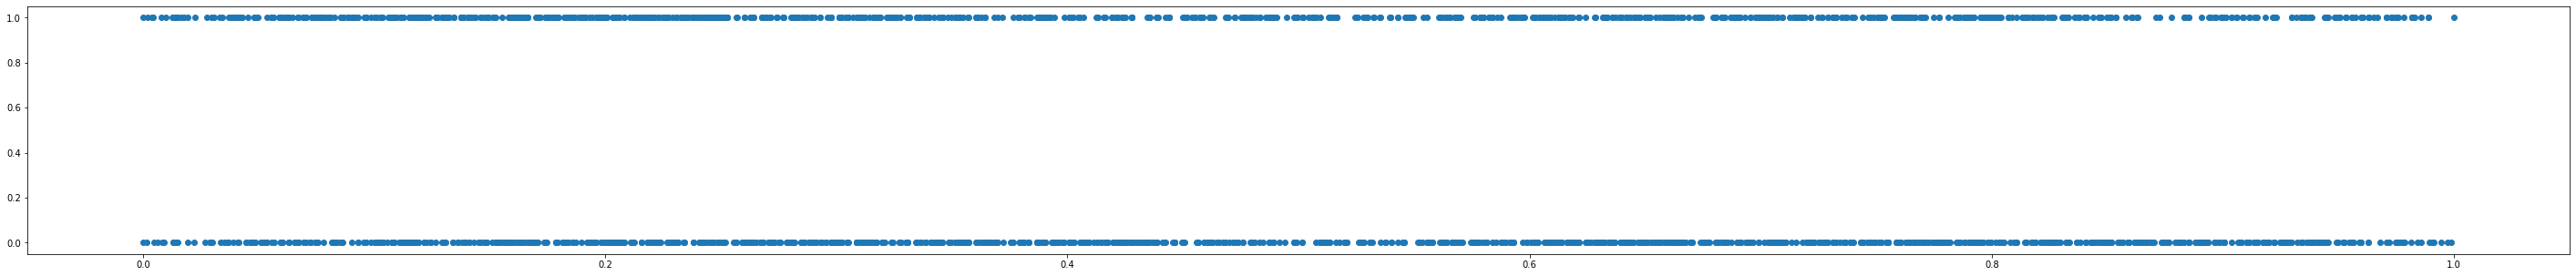

In [188]:
f=plt.figure()
f.set_figwidth(50)
f.set_figheight(5)
plt.scatter(data_min_max_scaled['x1'],data_min_max_scaled['y'])
plt.show()

In [189]:
# Splitting dataset into training and testing part

In [191]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_min_max_scaled.iloc[:,0:2],data_min_max_scaled.iloc[:,2],test_size=0.20,random_state=0)

In [192]:
print(X_train.head())
print("Length of X_train",len(X_train))

            x1            x2
1508  0.883094  1.939553e-06
1106  0.677974  1.594622e-06
847   0.309593  1.242657e-06
1753  0.419476  9.681020e-07
2214  0.859285  2.069047e-06
Length of X_train 1781


# Implementing Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(dual=False,solver='liblinear')
logreg_model.fit(X_train,y_train)
y_pred=logreg_model.predict(X_test)

In [218]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[198  44]
 [136  68]]


              precision    recall  f1-score   support

         0.0       0.59      0.82      0.69       242
         1.0       0.61      0.33      0.43       204

    accuracy                           0.60       446
   macro avg       0.60      0.58      0.56       446
weighted avg       0.60      0.60      0.57       446



In [219]:
print("Training set score for logistic regression: %f" % logreg_model.score(X_train , y_train))
print("Testing  set score for logistic regression: %f" % logreg_model.score(X_test  , y_test ))

Training set score for SVM: 0.581134
Testing  set score for SVM: 0.596413


# SVM with Linear Kernel

In [237]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
params_grid = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=10)

In [238]:
svm_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [239]:
y_pred = svm_model.best_estimator_.predict(X_test)

In [240]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[242   0]
 [204   0]]


              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       242
         1.0       0.00      0.00      0.00       204

    accuracy                           0.54       446
   macro avg       0.27      0.50      0.35       446
weighted avg       0.29      0.54      0.38       446



C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [241]:
print("Training set score for SVM_linear: %f" % svm_model.score(X_train , y_train))
print("Testing  set score for SVM_linear: %f" % svm_model.score(X_test  , y_test ))

Training set score for SVM: 0.561482
Testing  set score for SVM: 0.542601


# SVM with Radial Bias Function

In [301]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8, 1e-10],'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=10)

In [302]:
svm_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07,
                                    1e-08, 1e-10],
                          'kernel': ['rbf']}])

In [303]:
final_model=svm_model.best_estimator_
y_pred = final_model.predict(X_test)

In [304]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[242   0]
 [204   0]]


              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       242
         1.0       0.00      0.00      0.00       204

    accuracy                           0.54       446
   macro avg       0.27      0.50      0.35       446
weighted avg       0.29      0.54      0.38       446



C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [305]:
print("Training set score for SVM_rbf: %f" % final_model.score(X_train , y_train))
print("Testing  set score for SVM_rbf: %f" % final_model.score(X_test  , y_test ))

Training set score for SVM: 0.561482
Testing  set score for SVM: 0.542601


# Decision Tree Classifier

In [273]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
base_estimator=DecisionTreeClassifier(max_depth=17,criterion='gini', splitter='best', min_samples_split=5)
model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=150,learning_rate=0.0001)
model=model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)



print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[227  15]
 [ 14 190]]


              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       242
         1.0       0.93      0.93      0.93       204

    accuracy                           0.93       446
   macro avg       0.93      0.93      0.93       446
weighted avg       0.94      0.93      0.93       446



In [274]:
print("Training set score for DT: %f" % model.score(X_train , y_train))
print("Testing  set score for DT: %f" % model.score(X_test  , y_test ))

Training set score for SVM: 0.972487
Testing  set score for SVM: 0.934978


#  KNN

In [275]:
from sklearn.neighbors import KNeighborsClassifier

In [298]:
knn = KNeighborsClassifier(n_neighbors=2,leaf_size=10)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[203  39]
 [149  55]]


              precision    recall  f1-score   support

         0.0       0.58      0.84      0.68       242
         1.0       0.59      0.27      0.37       204

    accuracy                           0.58       446
   macro avg       0.58      0.55      0.53       446
weighted avg       0.58      0.58      0.54       446



In [299]:
print("Training set score for KNN: %f" % knn.score(X_train , y_train))
print("Testing  set score for KNN: %f" % knn.score(X_test  , y_test ))

Training set score for SVM: 0.780460
Testing  set score for SVM: 0.578475


# Comparison

After using all the types of algorithm as said in instruction. I am able to get highest accuracy while using Dicision Tree Classifier using AdaBoostClassifier. MY training accuracy is around 97% and test accuracy is around=93.5 %. In 2nd place we KNN has the better performance with Training accuarcy is 78% and test accuracy is 57%. SVM is also not performing well in this dataset. THis is because  SVM uses the kernel trick to turn a linearly nonseparable problem into a linearly separable one (unless of course we use the linear kernel), while decision trees (and forests based on them, and boosted trees, both to a lesser extent due to the nature of the ensemble algorithms) split the input space into hyper-rectangles according to the target. 
Thank you. 